In [1]:
# This is the preamble. Nothing needs to be changed here
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
from hbrs_grader import Exam, multi_column_df_display

# Example Course WiSe 2042

## Ergebnisse der Klausur vom 31. Februar 2114

**Ohne Gewähr!**

In [2]:
import datetime

print('Stand: ', datetime.date.today())

Stand:  2019-09-16


In [3]:
# Open the CSV file exported from DIAS
ex = Exam(r'exam_in.csv')

## display the table
#ex.grades

In [4]:
#set the number of assignments and a prefix for the column title
ex.set_assignments(5, points = [21, 16, 21, 20, 22], prefix = 'Aufgabe ')

# Grade the exams by entering points

ex.enter_points(9283492, [21,  4, 12, 10, 12])
ex.enter_points(1124835, [14, 14, 16, 20, 15])
ex.enter_points(4450683, [10, 10, 20, 15,  0])
ex.enter_points(1134928, [ 7,  0, 21, 20,  2])
ex.enter_points(2234643, [ 0,  0, 17,  0,  6])
ex.enter_points(7645764, [10, 16, 20, 12, 10])
ex.enter_points(2245675, [21, 16,  6,  0, 10])
ex.enter_points(1111093, [10, 16,  0, 20, 10])
ex.enter_points(7777878, [12, 16, 21, 10,  0])
ex.enter_points(2234453, [19, 10, 21, 18, 20])
ex.enter_points(2346543, [14, 10, 21,  0,  0])
ex.enter_points(1345677, [11, 15, 19,  8, 15])
ex.enter_points(4377298, [ 9, 10, 14,  6,  5])
ex.enter_points(2947820, [15,  6, 10, 10, 15])
ex.enter_points(2947729, [ 0,  0, 20,  8,  4])
ex.enter_points(3652739, [16,  0, 21, 20, 12])
ex.enter_points(2937749, [17, 16, 18, 12,  9])
ex.enter_points(9773921, [20, 14, 11, 20,  9])
ex.enter_points(7367299, [15, 16, 18, 20, 21])

# explicitly state that some students did not show up or hand anything in
ex.set_ne(1098789)

# Decide a passing limit and a limit for a perfect grade, i.e. a 1,0.
# Iterate a few times and try out different limits here.
ex.calc_grades(0.4,0.85)

# uncomment the following two lines check the scores while we go
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(ex.grades)

# uncomment the following line to check the score of a single student
#ex.get(2937749)

In [5]:
# To write the grades to DIAS, we need to export the relevant columns to csv format
ex.write_csv('exam_graded.csv')

# In principle, we are done grading. Now surpress all output above this cell by commenting the appropriate lines.

In [6]:
# The following code will generate statistical data that can be published for the students.

# print exam statistics
tables = []
tables.append( ex.exam_statistics() )
tables.append( ex.assignment_statistics() )
multi_column_df_display(tables)

**Info:** 
 - In der rechten Tabelle sieht man die Statistiken über die erreichten Punkte jeder Teilaufgabe, sowie der Klausur im Ganzen. Die Spalten sind unabhängig voneinander zu betrachten.
 - Ein *Quantil* gibt an, wie oft dieser oder ein kleinerer Wert vorkommt. *Beispiel:* Wenn das 50%-Quantil einer Aufgabe bei 9 Punkten liegt bedeutet dass, dass 50% der Studierenden 9 oder weniger Punkte für diese Aufgabe bekommen haben. 
 - Die *Schwierigkeit* einer Aufgabe ist der Mittelwert der erreichten Punkte geteilt durch die erreichbaren Punkte. Eine Schwierigkeit von 1.0 bedeutet, dass jeder die Aufgabe geschafft hat.
 - Der *Diskriminierungsindex* ist ein Maß dafür, wie weit die Aufgabe die Studierenden mit den höchsten Gesamtwertungen von den Studierenden mit den niedrigsten Gesamtwertungen separiert. Der Wert liegt zwischen -1 und 1, wobei -1 bedeutet, dass die Studierenden mit einer niedrigen Gesamtwertung erfolgreicher in der Teilaufgabe waren während ein Wert von 1 bedeutet, dass die Studierenden mit einer hohen Gesamtwertung in der Teilaufgabe erfolgreicher waren.

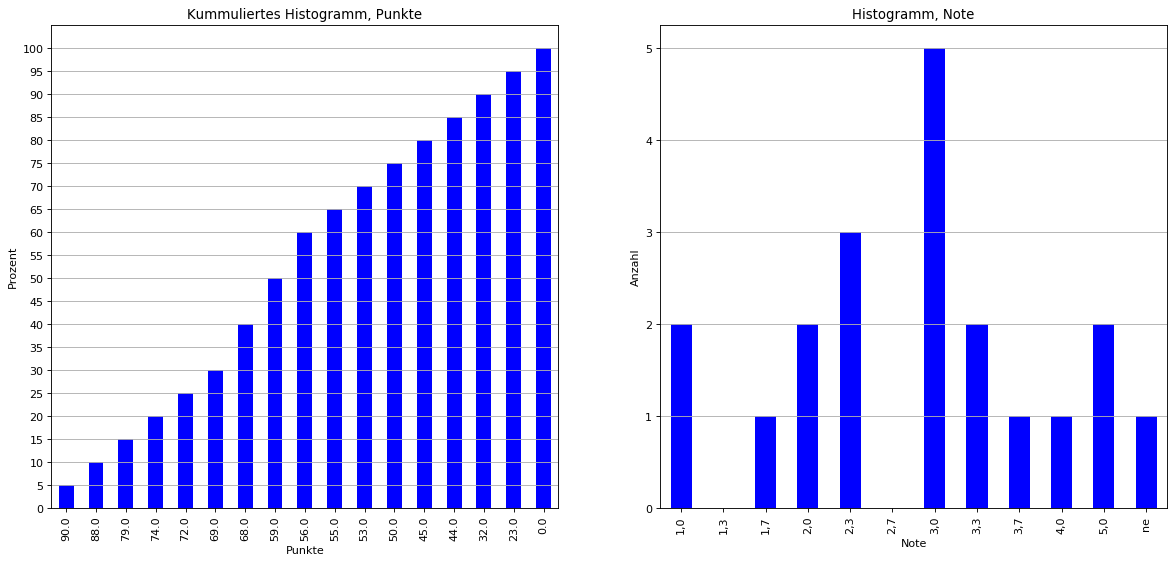

In [7]:
# create some statistical graphs
plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')

# plot a cumulative histogram of points
plt.subplot(1, 2, 1)
h1 = ex.histogram(relative = True, cumulative = True)

#plot histogram of grades
plt.subplot(1, 2, 2)
h2 = ex.histogram(grades = True)

In [8]:
# only publish Matrikelnummern together with the grade
results = ex.grades[['MatrNr', 'Note', 'Punkte']]

# print results and  the table that maps points to grades
list_dfs = []
list_dfs.append( results.sort_values(by=['MatrNr']) )
list_dfs.append( ex.grade_point_table() )
multi_column_df_display(list_dfs)

,MatrNr,Note,Punkte
16,1098789,ne,0.0
7,1111093,"3,0",56.0
1,1124835,"1,7",79.0
3,1134928,"3,3",50.0
11,1345677,"2,3",68.0
9,2234453,"1,0",88.0
4,2234643,"5,0",23.0
6,2245675,"3,3",53.0
10,2346543,"3,7",45.0
17,2937749,"2,0",72.0
